In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [4]:
# Remplace 'final.xl' par le chemin de ton fichier Excel
file_path = '/home/student24/Desktop/Hackaton_Blood/Indabax_Project_Blood/data/final(1).xlsx'

# Charger le fichier Excel
df = pd.read_excel(file_path, engine='openpyxl')

# Afficher les premières lignes du DataFrame
print(df.head())

  Date de remplissage de la fiche Date de naissance  Age Niveau d'etude  \
0             2019-03-11 00:00:00        1999-09-01   20    Pas precise   
1             2019-03-21 00:00:00        1978-02-04   41  Universitaire   
2             1977-12-25 00:00:00        1977-12-25   42     Secondaire   
3             1986-02-06 00:00:00        1986-02-06   33     Secondaire   
4             1988-05-20 00:00:00        1988-05-20   31    Pas Precise   

   Genre  Taille  Poids Situation Matrimoniale (SM)            Profession  \
0  Homme     NaN     67                 Celibataire          Chaudronnier   
1  Homme     NaN     71                       Marie  Secretaire comptable   
2  Femme     NaN     61                       Marie            Commercant   
3  Homme     NaN     82                 Celibataire       Homme d'affaire   
4  Homme     NaN     73                 Celibataire            Beat maker   

  Arrondissement de residence  ...  \
0                    Douala 3  ...   
1         

### Basic information about the dataset

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 40 columns):
 #   Column                                                                                     Non-Null Count  Dtype         
---  ------                                                                                     --------------  -----         
 0   Date de remplissage de la fiche                                                            1886 non-null   object        
 1   Date de naissance                                                                          1886 non-null   datetime64[ns]
 2   Age                                                                                        1886 non-null   int64         
 3   Niveau d'etude                                                                             1886 non-null   object        
 4   Genre                                                                                      1886 non-null   object        
 5  

In [6]:
# Generate descriptive statistics for numerical columns only, excluding "Date de naissance"  
df.select_dtypes(include=['number']).describe()


,Age,Taille,Poids,Taux d'hemoglobine
count,1886.000000,62.000000,1886.000000,1886.000000
mean,31.346235,172.596774,68.162248,13.557476
std,8.230528,7.023286,10.617896,1.147653
min,18.000000,158.000000,50.000000,5.500000
25%,25.000000,168.000000,59.000000,13.400000
50%,30.000000,172.000000,68.000000,13.400000
75%,36.000000,177.000000,77.000000,13.900000
max,62.000000,192.000000,120.000000,20.000000


#### Summary of numerical variables:
 - Age: The average age is about 31 years, with a range from 18 to 62.  
- Height (Taille): The average height is around 172.6 cm, but data is limited (only 62 entries).  
- Weight (Poids): The average weight is approximately 68.2 kg, with a minimum of 50 kg and a maximum of 120 kg.  
- Hemoglobin Level (Taux d'hémoglobine): The mean value is 13.56 g/dL, with a minimum of 5.5 and a maximum of 20.  

In [7]:
# Check for missing values in each column
df.isnull().sum()


Date de remplissage de la fiche                                                                 0
Date de naissance                                                                               0
Age                                                                                             0
Niveau d'etude                                                                                  0
Genre                                                                                           0
Taille                                                                                       1824
Poids                                                                                           0
Situation Matrimoniale (SM)                                                                     0
Profession                                                                                      0
Arrondissement de residence                                                                     0
Quartier de Residenc

### Summary of missing values in the dataset:
- "Taille" (Height) is missing for 1824 entries, meaning only 62 values are available. This suggests a high level of missing data.
- "Si oui préciser la date du dernier don" (If yes, specify the date of last donation) is missing for 1098 entries, likely because many respondents never donated before.
- "Date de dernières règles (DDR)" (Last menstrual period date) is missing for 1846 entries, which makes sense as it applies only to female donors.
- "Si autres raison préciser" (If other reasons, specify) has missing values, but the total count isn’t shown here, meaning it could be mostly empty.

We just need to handle those from Taille("Height) since according to the litterature the Height is not an important feature for the donation

In [8]:
# Handling missing values
df.drop(columns=["Taille"], inplace=True)


## Visualization

/home/student24/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


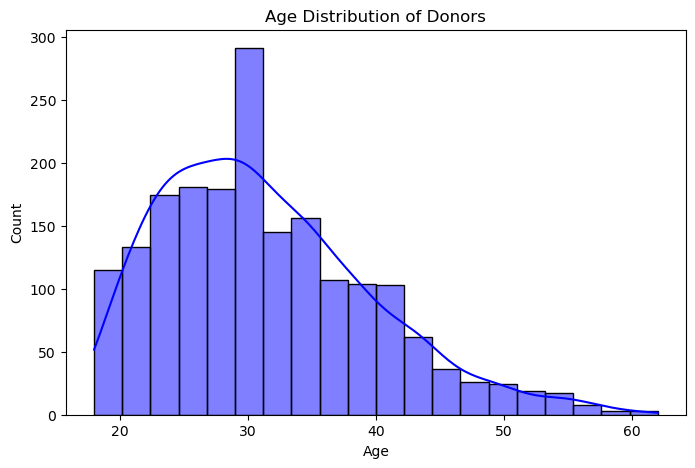

In [9]:
# Histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Donors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Observation :
The most common age range is 18 to 40 years old, with the majority of donors being around 30.

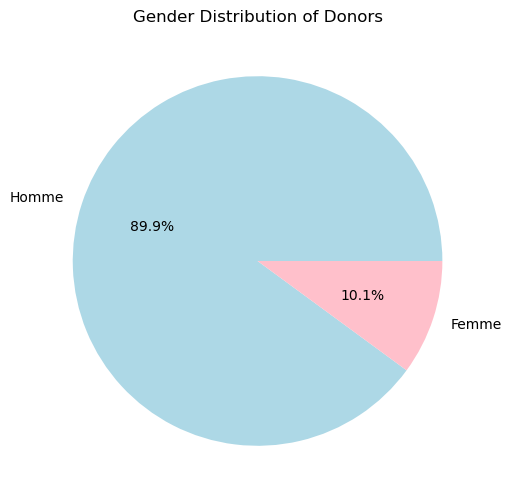

In [10]:
# Pie chart of gender
plt.figure(figsize=(6,6))
df["Genre"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "pink"])
plt.title("Gender Distribution of Donors")
plt.ylabel("")  # Hide y-axis label
plt.show()


### Observation : 
Most blood donors are men (89.9% of donors).

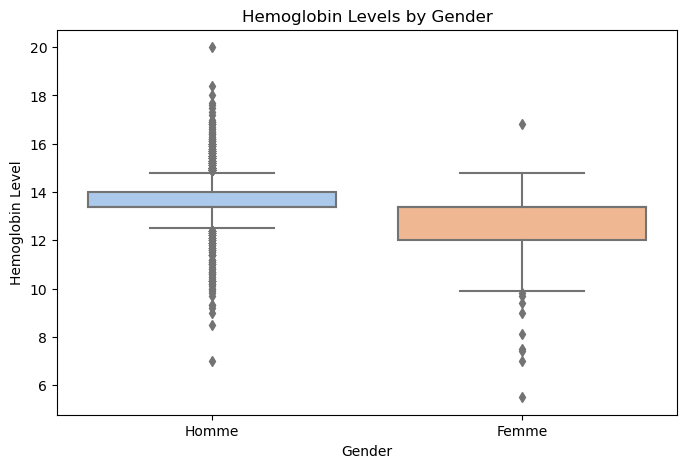

In [11]:
# Boxplot of hemoglobin levels by gender
plt.figure(figsize=(8,5))
sns.boxplot(x="Genre", y="Taux d'hemoglobine", data=df, palette="pastel")
plt.title("Hemoglobin Levels by Gender")
plt.xlabel("Gender")
plt.ylabel("Hemoglobin Level")
plt.show()


### Observation :

Men generally have higher hemoglobin levels than women. There are outliers on both sides, especially some very low values that could indicate anemia.

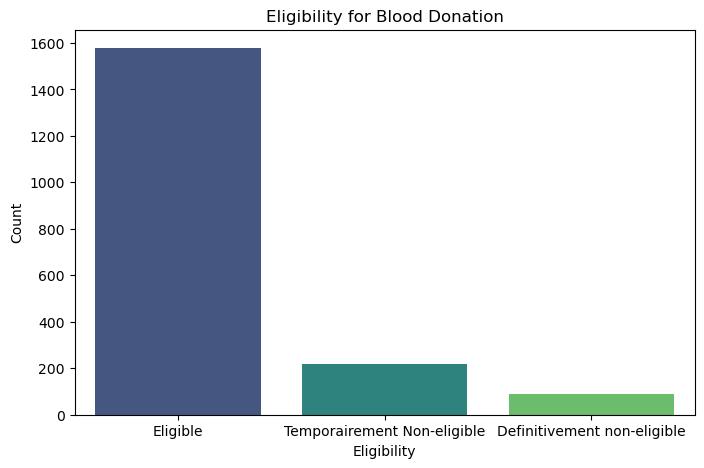

In [12]:
#Count of Eligible vs Non-Eligible Donors
plt.figure(figsize=(8,5))
sns.countplot(x="ELIGIBILITE AU DON.", data=df, palette="viridis")
plt.title("Eligibility for Blood Donation")
plt.xlabel("Eligibility")
plt.ylabel("Count")
plt.show()


### Observation:
This bar chart shows the eligibility for blood donation among the surveyed individuals. The majority of people (around 1600) are eligible to donate blood. A smaller portion (about 200-250) is temporarily non-eligible, likely due to conditions like recent illness, low hemoglobin, or recent blood donation. An even smaller group (less than 100) is permanently non-eligible, possibly due to chronic diseases or other medical conditions.

Overall, the data suggests that most people in the sample meet the requirements for blood donation.

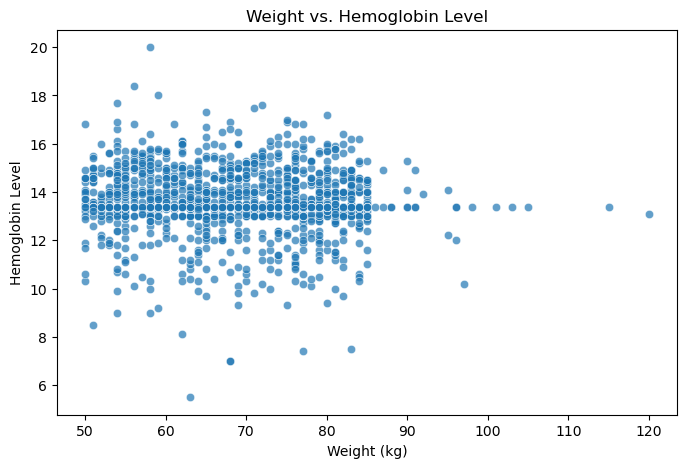

In [13]:
# Relationship Between Weight and Hemoglobin Level
plt.figure(figsize=(8,5))
sns.scatterplot(x="Poids", y="Taux d'hemoglobine", data=df, alpha=0.7)
plt.title("Weight vs. Hemoglobin Level")
plt.xlabel("Weight (kg)")
plt.ylabel("Hemoglobin Level")
plt.show()


### Observation:
This scatter plot shows that there is no strong correlation between weight and hemoglobin level. Most values are concentrated between 50-90 kg for weight and 12-16 g/dL for hemoglobin. There are some outliers with very low or very high hemoglobin levels, but overall, weight does not seem to significantly impact hemoglobin levels.

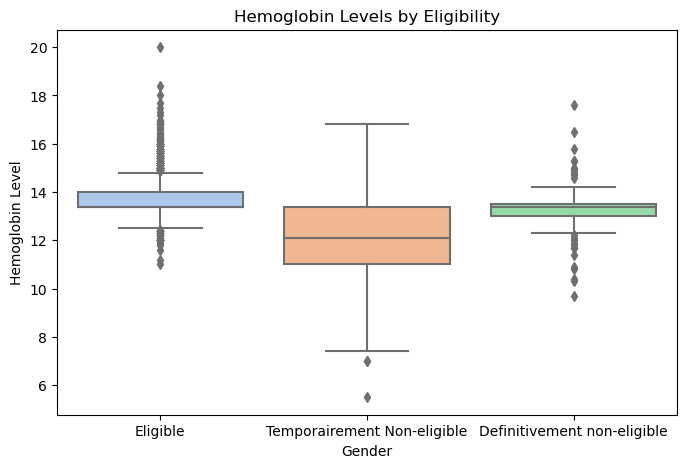

In [15]:
# Boxplot of hemoglobin levels by Eligibility
plt.figure(figsize=(8,5))
sns.boxplot(x="ELIGIBILITE AU DON.", y="Taux d'hemoglobine", data=df, palette="pastel")
plt.title("Hemoglobin Levels by Eligibility")
plt.xlabel("Gender")
plt.ylabel("Hemoglobin Level")
plt.show()


### Observation :
A significant portion of eligible candidates have a hemoglobin level above 15 g/dL. However, more broadly, hemoglobin level is not a discriminating factor across different eligibility thresholds.


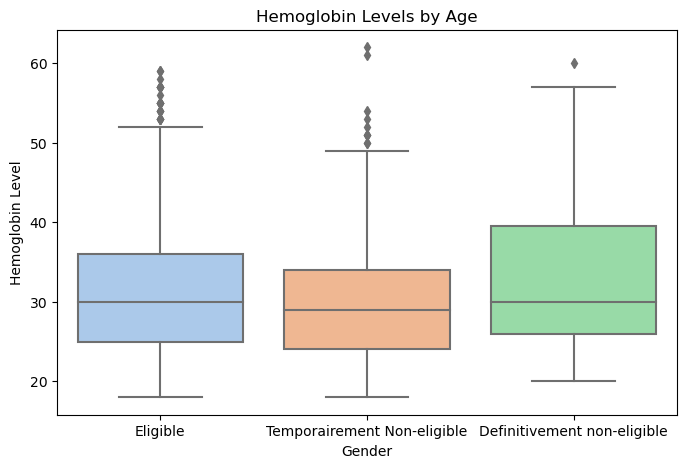

In [17]:
# Boxplot of hemoglobin levels by Eligibility
plt.figure(figsize=(8,5))
sns.boxplot(x="ELIGIBILITE AU DON.", y="Age", data=df, palette="pastel")
plt.title("Hemoglobin Levels by Age")
plt.xlabel("Gender")
plt.ylabel("Hemoglobin Level")
plt.show()


### Observation :
Eligible donors are, on average, 30 years old. However, we also see older individuals who are able to donate blood, likely due to an absence of medical history issues